# Assignment 2

What should you do?

The purpose of this homework is to start building your ML pipeline. Don't worry too much about solving the specific problem well. Focus on the overall structure, code modularity and extensibility, and getting familiar with sklearn.

1. Read Data: For this assignment, assume input is CSV and write a function that can read a csv into python

2. Explore Data: You can use the code you wrote for assignment 1 here to generate distributions and data summaries.

3. Pre-Process Data: For this assignment, you can limit this to filling in missing values for the variables that have missing values. You can use any simple method to do it (use mean to fill in missing values).

4. Generate Features/Predictors: For this assignment, you should write one function that can discretize a continuous variable and one function that can take a categorical variable and create binary/dummy variables from it. Apply them to at least one variable each in this data.

5. Build Classifier: For this assignment, select any classifier you feel comfortable with (Logistic Regression for example)

6. Evaluate Classifier: you can use any metric you choose for this assignment (accuracy is the easiest one). Feel free to evaluate it on the same data you built the model on (this is not a good idea in general but for this assignment, it is fine). We haven't covered models and evaluation yet, so don't worry about creating validation sets or cross-validation. 

What to submit: You should submit:

link to the code (on github) for the ML Pipeline with the components listed above in your github repository
a writeup describing what you did and results of running the code on the following problem


## 1 and 2: Read and Explore Data

In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns

In [4]:
## Read the data
def read_data(csv_file):
    '''
    Given a csv file, use the pandas function to read the file into a dataframe. 
    
    Input:
        csv file name - string
    
    Output:
        pandas dataframe
    '''
    df = pd.read_csv(csv_file)
    
    return df

In [131]:
df = read_data('credit-data.csv')

In [6]:
df.head()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,60644,2,0.802982,9120,13,0,6,0,2
1,2,0,0.957151,40,60637,0,0.121876,2600,4,0,0,0,1
2,3,0,0.658180,38,60601,1,0.085113,3042,2,1,0,0,0
3,4,0,0.233810,30,60601,0,0.036050,3300,5,0,0,0,0
4,5,0,0.907239,49,60625,1,0.024926,63588,7,0,1,0,0


In [7]:
df.shape

(150000, 13)

In [13]:
df.dtypes

PersonID                                  int64
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
zipcode                                   int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [57]:
excel_file = pd.read_excel('Data Dictionary.xls')

In [63]:
excel_file

,Variable Name,Description,Type
0,SeriousDlqin2yrs,Person experienced 90 days past due delinquenc...,Y/N
1,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lin...,percentage
2,age,Age of borrower in years,integer
3,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days p...,integer
4,zipcode,zipcode of the borrower,interget/string
5,DebtRatio,"Monthly debt payments, alimony,living costs di...",percentage
6,MonthlyIncome,Monthly income,real
7,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loa...,integer
8,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or m...,integer
9,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans inclu...,integer


In [61]:
for i in excel_file['Description']:
    print(i)

Person experienced 90 days past due delinquency or worse 
Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits
Age of borrower in years
Number of times borrower has been 30-59 days past due but no worse in the last 2 years.
zipcode of the borrower
Monthly debt payments, alimony,living costs divided by monthy gross income
Monthly income
Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)
Number of times borrower has been 90 days or more past due.
Number of mortgage and real estate loans including home equity lines of credit
Number of times borrower has been 60-89 days past due but no worse in the last 2 years.
Number of dependents in family excluding themselves (spouse, children etc.)


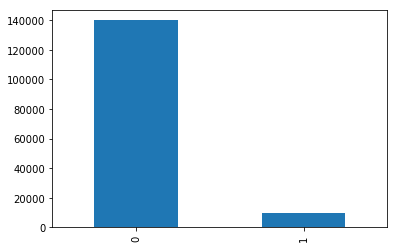

In [22]:
# Exploratory Data Analysis
df.SeriousDlqin2yrs.value_counts().plot(kind='bar')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1216fb4e0>]], dtype=object)

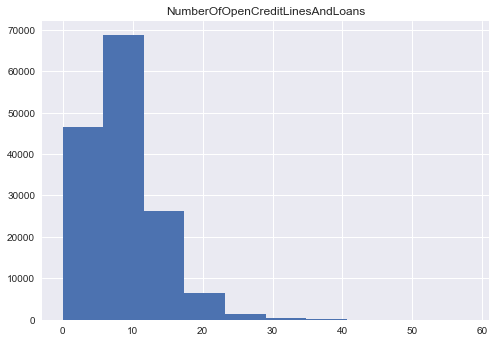

In [64]:
df.hist(column='NumberOfOpenCreditLinesAndLoans')

In [65]:
df.NumberOfOpenCreditLinesAndLoans.describe()

count    150000.000000
mean          8.452760
std           5.145951
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          58.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

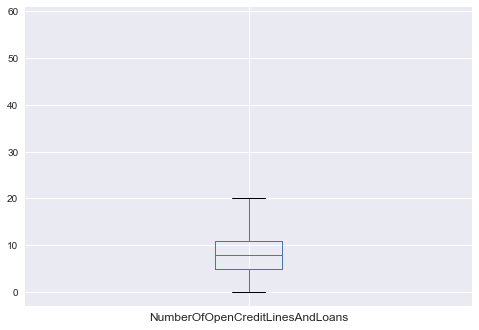

In [225]:
df[['NumberOfOpenCreditLinesAndLoans']].boxplot()

In [69]:
df[df['NumberOfOpenCreditLinesAndLoans'] > 50]

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
16537,16538,0,0.098127,61,60625,0,0.323779,10500.0,54,0,2,0,0.0
22683,22684,0,0.020452,51,60618,0,0.032213,3600.0,57,0,0,0,0.0
30587,30588,0,0.003032,53,60618,0,5.967504,8000.0,58,0,54,0,0.0
37934,37935,0,0.022144,62,60601,0,0.399289,9000.0,51,0,2,0,0.0
38133,38134,0,0.053381,77,60625,0,0.282625,5271.0,52,0,1,0,1.0
51026,51027,0,0.020226,70,60657,0,0.074935,8900.0,56,0,0,0,2.0
54115,54116,0,0.052349,60,60644,0,0.637685,12800.0,54,0,2,0,2.0
66979,66980,0,0.028601,62,60644,0,0.711833,5416.0,54,0,5,0,0.0
87102,87103,1,0.140060,56,60629,2,1.099686,5416.0,52,0,2,0,0.0
105480,105481,0,0.477322,49,60657,0,6.006888,9000.0,54,0,7,0,3.0


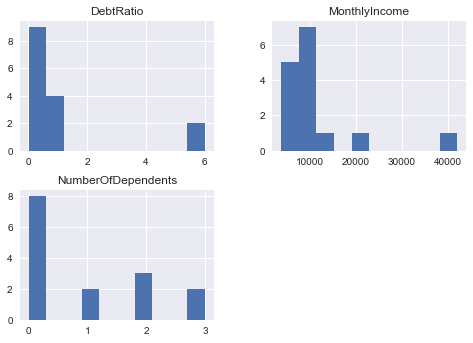

In [79]:
df[['DebtRatio', 'MonthlyIncome', 'NumberOfDependents']][df['NumberOfOpenCreditLinesAndLoans'] > 50].hist()
plt.show()

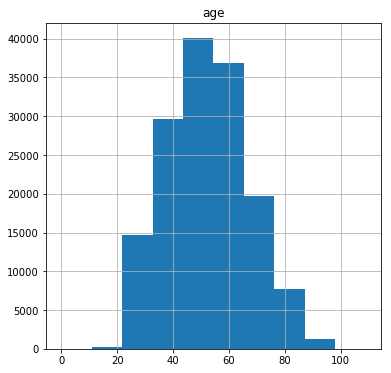

In [29]:
df.hist(column='age', figsize = (6,6))
plt.show()

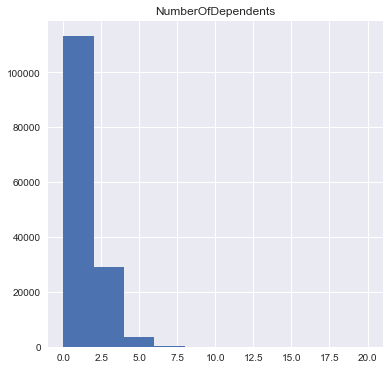

In [45]:
df.hist(column='NumberOfDependents', figsize = (6,6))
plt.show()

In [226]:
df.NumberOfDependents.describe()

count    150000.000000
mean          0.763573
std           1.101086
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

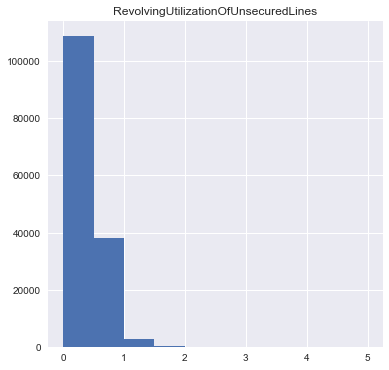

In [51]:
df.hist(column='RevolvingUtilizationOfUnsecuredLines', figsize = (6,6), range = (0, 5))
plt.show()

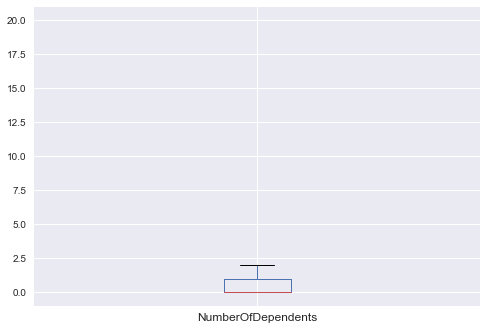

In [227]:
df[['NumberOfDependents']].boxplot()

In [54]:
df['RevolvingUtilizationOfUnsecuredLines'].describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [55]:
df['RevolvingUtilizationOfUnsecuredLines'].median()

0.154180737

In [81]:
df[df['RevolvingUtilizationOfUnsecuredLines'] >= 40000]

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
85489,85490,0,50708.0,55,60601,0,0.221757,38000.0,7,0,2,0,0.0


In [129]:
def correlation_matrix_vis(df):
    '''
    Given a dataframe, plot the correlation matrix
    
    Input:
        df - dataframe 
        
    Output:
        correlation matrix plot 
    '''
    import seaborn as sns

    f, ax = plt.subplots(figsize=(10, 8))
    corr = df.corr()
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
                square=True, ax=ax)
    

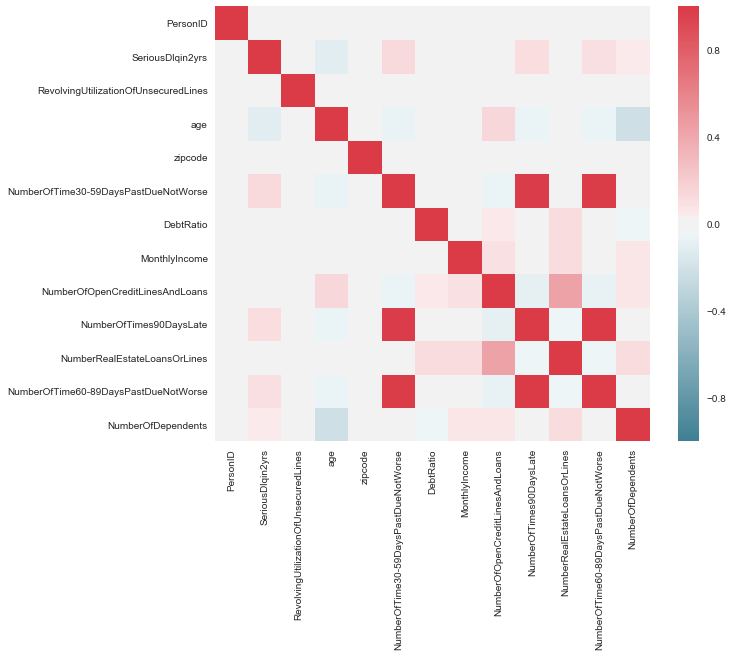

In [132]:
correlation_matrix_vis(df)

In [22]:
# Not all variables are significant, but this is a good way to get a snapshot. 
df.describe()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,60648.810013,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,56.748197,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,60601.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,60625.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,60629.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,60644.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,60804.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [8]:
# Observing different attributes grouped by zipcode
df['zipcode'].value_counts()

60625    33514
60629    16840
60637    16625
60657    16624
60618    16612
60804    16605
60601    16599
60644    16581
Name: zipcode, dtype: int64

In [7]:
df['zipcode'].unique()

array([60644, 60637, 60601, 60625, 60629, 60804, 60657, 60618])

In [20]:
zip_groubpy = df.groupby('zipcode')

In [21]:
zip_groubpy['MonthlyIncome'].mean()

zipcode
60601    6686.202265
60618    6686.423298
60625    6616.097155
60629    6628.618917
60637    6805.487779
60644    6595.882828
60657    6635.165337
60804    6764.866399
Name: MonthlyIncome, dtype: float64

In [25]:
zip_groubpy['SeriousDlqin2yrs'].value_counts()

zipcode  SeriousDlqin2yrs
60601    0                   15507
         1                    1092
60618    0                   15495
         1                    1117
60625    0                   31326
         1                    2188
60629    0                   15763
         1                    1077
60637    0                   15477
         1                    1148
60644    0                   15475
         1                    1106
60657    0                   15489
         1                    1135
60804    0                   15442
         1                    1163
Name: SeriousDlqin2yrs, dtype: int64

In [26]:
zip_groubpy['age'].mean()

zipcode
60601    52.283692
60618    52.267517
60625    52.325655
60629    52.177316
60637    52.254917
60644    52.222182
60657    52.405318
60804    52.395544
Name: age, dtype: float64

In [28]:
zip_groubpy['DebtRatio'].mean()

zipcode
60601    341.845144
60618    342.504132
60625    360.240703
60629    345.670767
60637    338.034538
60644    373.641741
60657    357.009182
60804    357.873771
Name: DebtRatio, dtype: float64

In [29]:
zip_groubpy['DebtRatio'].std()

zipcode
60601    1112.272899
60618    1391.219657
60625    2652.711364
60629    1432.722787
60637    1201.769595
60644    3703.489993
60657    1224.377114
60804    1188.894471
Name: DebtRatio, dtype: float64

There are no significant differences between the zip codes when it comes to age, debtratio or income distribution. 

In [30]:
serious_delin = df.groupby('SeriousDlqin2yrs')

In [31]:
serious_delin.dtypes

,DebtRatio,MonthlyIncome,NumberOfDependents,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,PersonID,RevolvingUtilizationOfUnsecuredLines,age,zipcode
SeriousDlqin2yrs,,,,,,,,,,,,
0,float64,float64,float64,int64,int64,int64,int64,int64,int64,float64,int64,int64
1,float64,float64,float64,int64,int64,int64,int64,int64,int64,float64,int64,int64


In [32]:
serious_delin['MonthlyIncome'].mean()

SeriousDlqin2yrs
0    6747.837774
1    5630.826493
Name: MonthlyIncome, dtype: float64

In [91]:
serious_delin['MonthlyIncome'].median()

SeriousDlqin2yrs
0    5466.0
1    4500.0
Name: MonthlyIncome, dtype: float64

In [33]:
serious_delin['DebtRatio'].mean()

SeriousDlqin2yrs
0    357.151168
1    295.121066
Name: DebtRatio, dtype: float64

In [35]:
serious_delin['NumberOfOpenCreditLinesAndLoans'].mean()

SeriousDlqin2yrs
0    8.493620
1    7.882306
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

In [42]:
serious_delin['NumberOfTimes90DaysLate'].mean()

SeriousDlqin2yrs
0    0.135225
1    2.091362
Name: NumberOfTimes90DaysLate, dtype: float64

In [43]:
serious_delin['age'].mean()

SeriousDlqin2yrs
0    52.751375
1    45.926591
Name: age, dtype: float64

In [135]:
def groupby_mean_plot(data, cols, group_by_col):

    '''
    Given a dataframe, a variable to group by and an array of columns,
    generate a plot of these grouped columns with mean of the group
    '''
    data[cols].groupby(group_by_col).mean().plot()

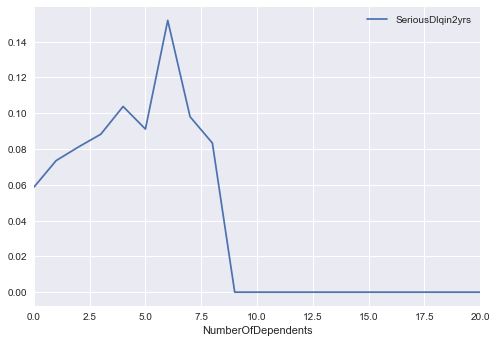

In [136]:
groupby_mean_plot(df, ['NumberOfDependents', 'SeriousDlqin2yrs'], 'NumberOfDependents')

## 3: Preprocessing data

Analysis for this part bases itself on: https://github.com/yhat/DataGotham2013/blob/master/analysis/main.py

In [44]:
# Transform dataframe into a series of key value pairs, in order to find which ones have null values in them. 
df_long = pd.melt(df)

In [48]:
df_long.head()

,variable,value
0,PersonID,1.0
1,PersonID,2.0
2,PersonID,3.0
3,PersonID,4.0
4,PersonID,5.0


In [148]:
def null_freq(df):
    """
    Given a dataframe, calculate how many null values there are, if any, per variable, 
    and return a dataframe with the results and counts of how many null values there are.  
    """
    df_long = pd.melt(df)
    null_variables = df_long.value.isnull()
    return pd.crosstab(df_long.variable, null_variables)

In [149]:
null_df = null_freq(df)

In [58]:
null_df

value,False,True
variable,,
DebtRatio,150000,0
MonthlyIncome,120269,29731
NumberOfDependents,146076,3924
NumberOfOpenCreditLinesAndLoans,150000,0
NumberOfTime30-59DaysPastDueNotWorse,150000,0
NumberOfTime60-89DaysPastDueNotWorse,150000,0
NumberOfTimes90DaysLate,150000,0
NumberRealEstateLoansOrLines,150000,0
PersonID,150000,0


We can see that monthly income and Number of dependents both have null values. 

In [66]:
df['NumberOfDependents'].unique()

array([  2.,   1.,   0.,  nan,   3.,   4.,   5.,   6.,   8.,   7.,  20.,
        10.,   9.,  13.])

In [67]:
df[df['NumberOfDependents'] == 20]

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
6299,6300,0,0.226616,40,60657,1,0.576539,6316.0,11,2,1,0,20.0


In [68]:
df['NumberOfDependents'].mean()

0.7572222678605657

In [151]:
# It would seem that, on average, the number of depedents is approximately 1. Therefore, we will fill the NaN's with 1. 
df.NumberOfDependents = df.NumberOfDependents.fillna(1)

In [73]:
df['MonthlyIncome'].mean()

6670.221237392844

In [74]:
df['MonthlyIncome'].median()

5400.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118be86d8>]], dtype=object)

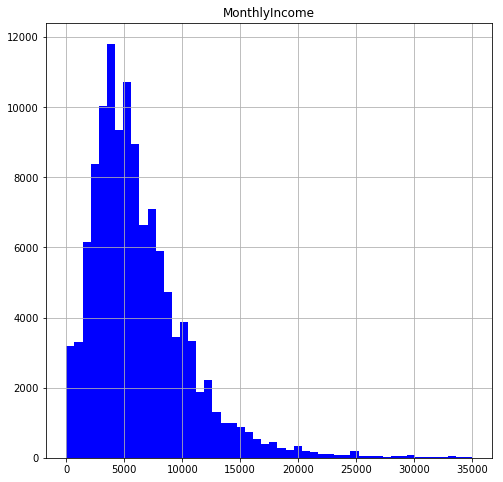

In [10]:
df.hist(column='MonthlyIncome',      # Column to plot
              figsize=(8,8),         # Plot size
              color="blue",          # Plot color
              bins=50,               # Use 50 bins
              range= (0,35000))      # Limit x-axis range

In [83]:
df.MonthlyIncome.max()

3008750.0

In [150]:
# As we can see from the histogram, the data is skewed, so we will use the median to replace the missing values. 
replacement_val = df.MonthlyIncome.median()
df.MonthlyIncome = df.MonthlyIncome.fillna(replacement_val)

In [152]:
test = null_freq(df)

In [153]:
# Number of dependents and Monthly Income no longer has any null values
test

value,False
variable,
DebtRatio,150000
MonthlyIncome,150000
NumberOfDependents,150000
NumberOfOpenCreditLinesAndLoans,150000
NumberOfTime30-59DaysPastDueNotWorse,150000
NumberOfTime60-89DaysPastDueNotWorse,150000
NumberOfTimes90DaysLate,150000
NumberRealEstateLoansOrLines,150000
PersonID,150000


## 4: Generate Features/Predictors 

For this assignment, you should write one function that can discretize a continuous variable and one function that can take a categorical variable and create binary/dummy variables from it. Apply them to at least one variable each in this data.

In [117]:
def discretize_var(df, var_name, bins, group_names=None):
    '''
    Turns a continuous variable into a discrete variable. 
    
    Inputs:
        df - dataframe
        var_name - string, variable name of variable to discretize 
        bins - list with buckets defined 
        group_names - list of label names, optional. 
    
    Output:
        df with new 'category' column. 
    '''
    df['categories'] = pd.cut(df[var_name], bins, labels=group_names)
    
    return df

In [120]:
bins = [20, 40, 60, 80, 110]
df = discretize_var(df, 'age', bins)

In [121]:
df[['categories', 'age']][0:5]

,categories,age
0,"(40, 60]",45
1,"(20, 40]",40
2,"(20, 40]",38
3,"(20, 40]",30
4,"(40, 60]",49


In [123]:
def create_dummy(df, varname):
    '''
    Transform a categorical variable into a dummy variable. 
    
    Input:
        df - dataframe
        varname - string, variable to convert
    '''
    # Create a dataframe of dummy variables from the categorical variable 
    df_dummy = pd.get_dummies(df[varname])
    
    # Join the dummy data frame with main dataframe 
    combined_df = pd.concat([df, df_dummy], axis=1)
    
    return combined_df

In [126]:
df = create_dummy(df, 'zipcode')

In [127]:
df.head()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,...,NumberOfDependents,categories,60601,60618,60625,60629,60637,60644,60657,60804
0,1,1,0.766127,45,60644,2,0.802982,9120.0,13,0,...,2.0,"(40, 60]",0,0,0,0,0,1,0,0
1,2,0,0.957151,40,60637,0,0.121876,2600.0,4,0,...,1.0,"(20, 40]",0,0,0,0,1,0,0,0
2,3,0,0.658180,38,60601,1,0.085113,3042.0,2,1,...,0.0,"(20, 40]",1,0,0,0,0,0,0,0
3,4,0,0.233810,30,60601,0,0.036050,3300.0,5,0,...,0.0,"(20, 40]",1,0,0,0,0,0,0,0
4,5,0,0.907239,49,60625,1,0.024926,63588.0,7,0,...,0.0,"(40, 60]",0,0,1,0,0,0,0,0


## 5 Build Classifier and 6 Evaluate Classifier 

For this assignment, select any classifier you feel comfortable with (Logistic Regression for example)

In [196]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [208]:
def logistic_model(X_train, X_test, y_train, y_test, labels):
    '''
    Creates a classification based on a logistic regression. 
    
    Returns:
        rfe - rfe object
        predicted - predicted values
        expected - expected values
        X_test 
        y_test 
    '''
    # Creates Model
    model = LogisticRegression()
    rfe = RFE(model) 
    
    # Fit model
    log_fit = rfe.fit(X_train, y_train)
    predicted = rfe.predict(X_test)
    expected = y_test
    accuracy = accuracy_score(expected, predicted)
    
    return rfe, predicted, expected, X_test, y_test, labels

In [206]:
def accuracy(expected, predicted):
    '''
    Given the expected and predicted values, calculate the accuracy score. 
    '''
    return accuracy_score(expected, predicted)

In [209]:
def get_best_model(X_train, X_test, y_train, y_test, labels):
    '''
    Get best features from model, classification report, and accuracy score. 
    '''
    rfe_obj, predicted, expected, X_test, y_test, labels = logistic_model(X_train, X_test, y_train, y_test, labels)
    
    # Get best features 
    best_features = rfe_obj.get_support(indices=True)
    
    feature_list = []
    
    for i in best_features:
        feature_list.append(labels[i])
        
    report = classification_report(expected, predicted)
    
    # Get accuracy 
    acc = accuracy(expected, predicted)
    
    return feature_list, report, acc

In [187]:
# Define y as my dependent variable, and X as the dataframe without the dependent variable column 
y = df['SeriousDlqin2yrs']
X = df.drop(['SeriousDlqin2yrs'], axis=1)

In [210]:
df.columns

Index(['PersonID', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines',
       'age', 'zipcode', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'],
      dtype='object')

In [211]:
# Dropping variables which I deem unnecessary for the model
X = X.drop(['PersonID', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse'], axis=1)

In [213]:
# build training and testing sets
# test set is 20% of entire data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [214]:
labels = {}
for i, val in enumerate(X_train.columns):
    if i not in labels.keys():
        labels[i] = val

In [217]:
best_features, report, acc = get_best_model(X_train, X_test, y_train, y_test, labels)

In [218]:
best_features

['age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'NumberRealEstateLoansOrLines',
 'NumberOfDependents']

In [220]:
print(report)

             precision    recall  f1-score   support

          0       0.94      1.00      0.97     28044
          1       0.52      0.01      0.03      1956

avg / total       0.91      0.93      0.91     30000



In [221]:
print(acc)

0.934866666667
